In [2]:
#Dependancy 
import pandas as pd

In [22]:
def getNumberOfTests(country, code):
  Covid19Test = Covid19TestSource[Covid19TestSource['Entity'] == country]
  return Covid19Test.drop(['Entity', 'Code'], axis=1).set_index('Date').rename(columns={
    'Total tests': code + '_test'
})

In [33]:
Covid19TestSource = pd.read_csv("data/full-list-total-tests-for-covid-19.csv") 
#convert Date column to date type
Covid19TestSource['Date']= pd.to_datetime(Covid19TestSource['Date'])
Covid19TestSource

,Entity,Code,Date,Total tests
0,Argentina,ARG,2020-04-08,13330
1,Argentina,ARG,2020-04-09,14850
2,Argentina,ARG,2020-04-10,16379
3,Argentina,ARG,2020-04-11,18027
4,Argentina,ARG,2020-04-13,19758
...,...,...,...,...
2662,Vietnam,VNM,2020-04-10,118807
2663,Vietnam,VNM,2020-04-11,121821
2664,Vietnam,VNM,2020-04-14,132771
2665,Vietnam,VNM,2020-04-15,135938


In [38]:
USCovid19Test = getNumberOfTests('United States', 'US')
ItalyCovid19Test = getNumberOfTests('Italy', 'Italy')
Covid19Test = pd.merge(
    ItalyCovid19Test, 
    USCovid19Test, 
    left_index=True, 
    right_index=True, 
    how='outer'
)
Covid19Test.tail()

,Italy_test,US_test
Date,,
2020-04-14,1073689,3081620.0
2020-04-15,1117404,3242755.0
2020-04-16,1178403,3401064.0
2020-04-17,1244108,3557493.0
2020-04-18,1305833,3698534.0


In [35]:
Covid19Test.describe()

,Italy_test,US_test
count,5.500000e+01,4.300000e+01
mean,3.975306e+05,1.176968e+06
std,3.938879e+05,1.218580e+06
min,4.324000e+03,2.389000e+03
25%,5.188150e+04,6.726300e+04
50%,2.584020e+05,7.476630e+05
75%,6.743425e+05,2.142798e+06
max,1.305833e+06,3.698534e+06


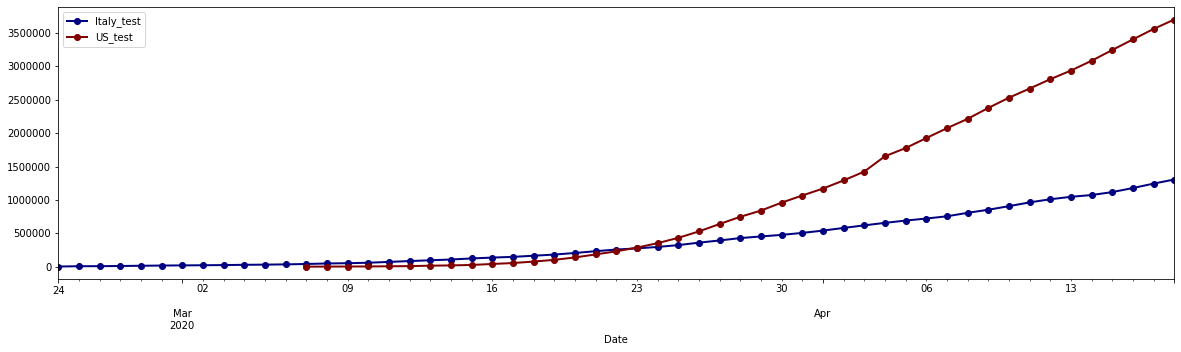

In [36]:
Covid19Test.plot(lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5))

In [39]:
import import_ipynb
import deaths_cases
deaths_cases.TotalCovid19Cases.tail()

Country/Region,China_confirmid,Italy_confirmid,US_confirmid,China_Recovered,Italy_Recovered,US_Recovered,China_death,Italy_death,US_death,China_active,Italy_active,US_active
4/14/20,83306,162488,607670,78200,37130,47763,3345,21067,25831,1761,104291,534076
4/15/20,83356,165155,636350,78311,38092,52096,3346,21645,28325,1699,105418,555929
4/16/20,83403,168941,667801,78401,40164,54703,3346,22170,32916,1656,106607,580182
4/17/20,83760,172434,699706,77552,42727,58545,4636,22745,36773,1572,106962,604388
4/18/20,83787,175925,732197,77614,44927,64840,4636,23227,38664,1537,107771,628693


In [74]:
TotalCovid19Cases = pd.merge(
    Covid19Test, 
    deaths_cases.TotalCovid19Cases, 
    left_index=True, 
    right_index=True, 
    how='outer'
)
TotalCovid19Cases.describe()

,Italy_test,US_test,China_confirmid,Italy_confirmid,US_confirmid,China_Recovered,Italy_Recovered,US_Recovered,China_death,Italy_death,US_death,China_active,Italy_active,US_active
count,5.500000e+01,4.300000e+01,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,3.975306e+05,1.176968e+06,64548.102273,43433.670455,109370.272727,42972.352273,7741.761364,6635.113636,2368.715909,5098.431818,4044.477273,19207.034091,30593.477273,98690.681818
std,3.938879e+05,1.218580e+06,28071.431981,59029.619655,202516.994580,31767.534328,12396.790759,14950.420997,1251.437104,7513.775884,8869.507787,19158.576417,39678.078695,179475.254229
min,4.324000e+03,2.389000e+03,548.000000,0.000000,1.000000,28.000000,0.000000,0.000000,17.000000,0.000000,0.000000,503.000000,0.000000,1.000000
25%,5.188150e+04,6.726300e+04,56111.000000,3.000000,12.750000,5933.250000,0.000000,3.000000,1306.000000,0.000000,0.000000,2616.250000,3.000000,10.000000
50%,2.584020e+05,7.476630e+05,80613.500000,4247.000000,239.500000,53118.000000,468.500000,7.000000,3029.500000,172.500000,13.000000,10344.500000,3606.000000,219.500000
75%,6.743425e+05,2.142798e+06,81922.500000,87991.500000,106609.000000,74815.000000,11308.500000,919.750000,3296.750000,9356.250000,1692.250000,33784.250000,67326.750000,103997.000000
max,1.305833e+06,3.698534e+06,83787.000000,175925.000000,732197.000000,78401.000000,44927.000000,64840.000000,4636.000000,23227.000000,38664.000000,58108.000000,107771.000000,628693.000000


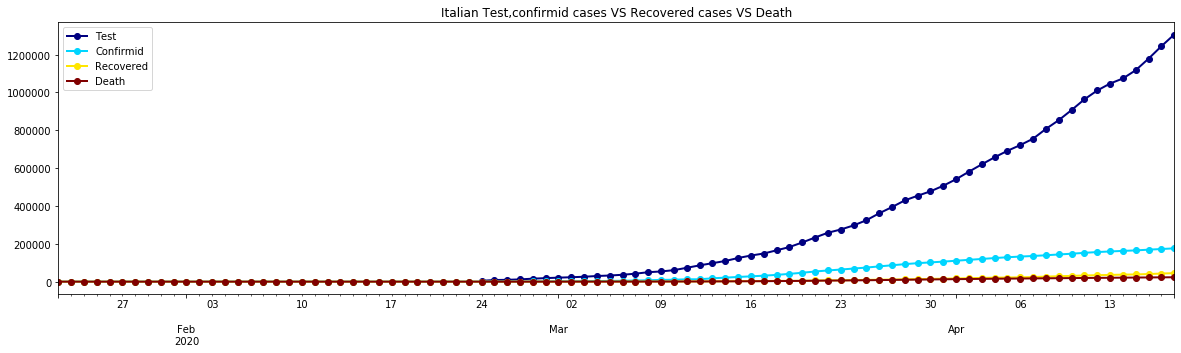

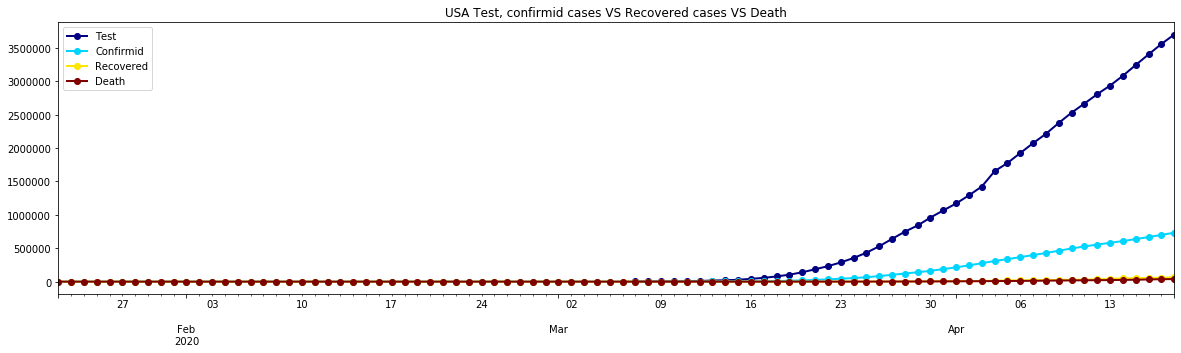

In [45]:
TotalCovid19Cases.plot(
    title='Italian Test,confirmid cases VS Recovered cases VS Death', 
    lw=2, colormap='jet', 
    marker='.', 
    markersize=12, 
    figsize=(20,5), 
    y=['Italy_test', 'Italy_confirmid', 'Italy_Recovered', 'Italy_death']).legend(
    ["Test", "Confirmid", "Recovered", "Death"]
)

TotalCovid19Cases.plot(
    title='USA Test, confirmid cases VS Recovered cases VS Death', 
    lw=2, 
    colormap='jet', 
    marker='.', 
    markersize=12, 
    figsize=(20,5), 
    y=['US_test', 'US_confirmid', 'US_Recovered', 'US_death']).legend(
    ["Test", "Confirmid", "Recovered", "Death"]
)